In [1]:
%pylab inline

import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

size = 100
grid = np.arange(1, size+1)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Генерируем выборку
s = sps.norm.rvs(size=size, loc=0, scale=1)

Оценка максимального правдоподобия для $\theta$ в $N(\theta, 1)$ - $\overline{X}$

Сопряженное априорное распределение - $N(\mu_{0}, \sigma_{0}^{2})$

$\Rightarrow апостериорное \space распределение - p(\theta \mid X) \sim N(\frac {\frac{\mu_{0}}{\sigma_{0}^{2}} + \frac{\sum^{n}_{i = 1}X_{i}} {\sigma^2}} {\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}}, \sigma_{1}^2)$

$\Rightarrow байесовская \space оценка - \hat{\theta} = E(\theta | X) = \frac {\frac{\mu_{0}}{\sigma_{0}^{2}} + \frac{\sum^{n}_{i = 1}X_{i}} {\sigma^2}} {\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}}$

$\sigma^{2} = 1 \Rightarrow \hat{\theta} = \frac {\frac{\mu_{0}}{\sigma_{0}^{2}} + \sum^{n}_{i = 1}X_{i} } {\frac{1}{\sigma_{0}^2} + n}$

In [3]:
#Считаем оценки
MLE_est = s.cumsum() / np.arange(1, size + 1)

params = [[0., 1.], [0., 100.], [10., 1.], [10., 100.]]
bayes_est = np.zeros(4*size).reshape(4, size)
for i in range(4):
    bayes_est[i] = (params[i][0] / params[i][1] + s.cumsum()) / (1 / params[i][1] + np.arange(1, size + 1))

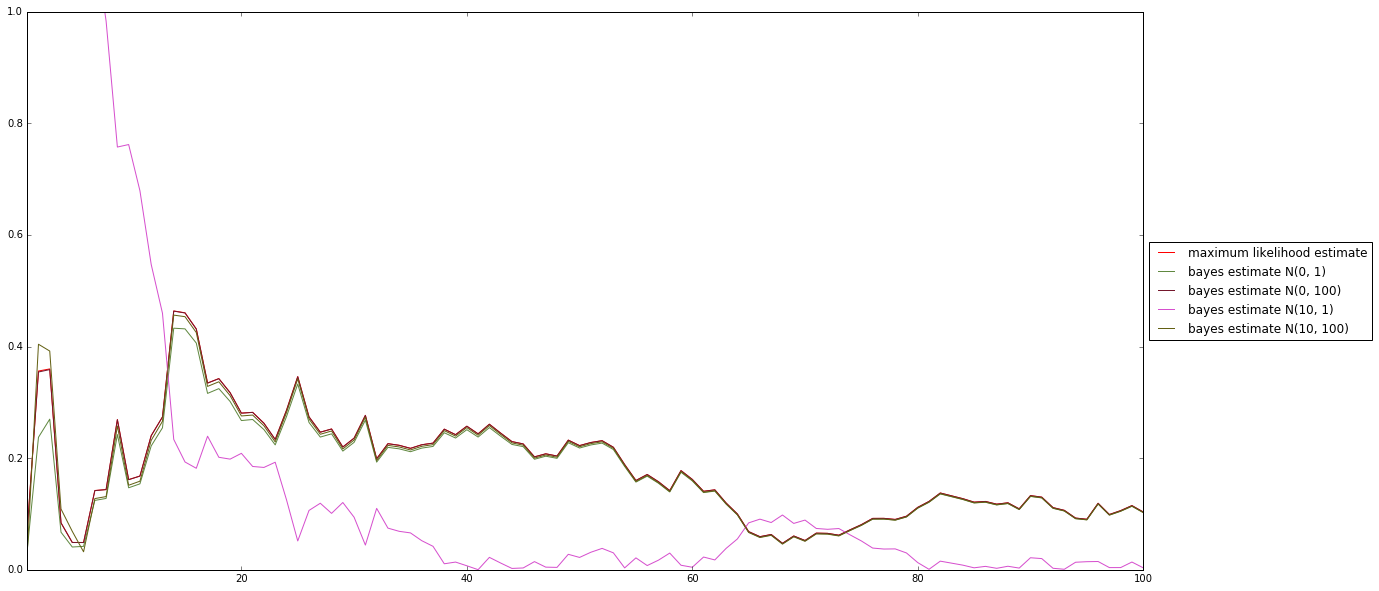

In [4]:
#Строим графики
plt.figure(figsize=(20,10))
plt.ylim((0, 1))
plt.xlim((1, 100))

plt.plot(grid, abs(MLE_est), color='red', label='maximum likelihood estimate')

for i in range(4):
    plt.plot(grid, abs(bayes_est[i]), color=random.rand(3,1), label='bayes estimate N(' \
             + str(int(params[i][0])) + ', ' + str(int(params[i][1])) + ')')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Лучшая оценка - байесовская с априорным N(10, 1)

Оценка максимального правдоподобия для $\theta$ в $N(0, \theta)\space-\space \overline {X^2}$

Сопряженное априорное распределение - $\mbox{Inv-Gamma}(\alpha, \beta)$

$\Rightarrow апостериорное \space распределение - p(\theta \mid X) \sim \mbox{Inv-Gamma}(\alpha + \frac{n}{2}, \beta + \frac{\sum_{i=1}^n (x_i-\mu)^2}{2})$

$\Rightarrow байесовская \space оценка - \hat{\theta} = E(\theta | X) = \frac{\beta'}{\alpha'-1} = \frac{\beta + \frac{\sum_{i=1}^n (x_i-\mu)^2}{2}}{\alpha + \frac{n}{2} - 1}$

$\mu = 0 \Rightarrow \hat{\theta} = \frac{2\beta + \sum_{i=1}^n x_i^2}{2\alpha + n - 2} $

In [5]:
#Считаем оценки
MLE_est = (s*s).cumsum() / np.arange(1, size + 1)

params = [[1., 1.], [1., 100.], [10., 1.], [10., 100.]]
bayes_est = np.zeros(4*size).reshape(4, size)
for i in range(4):
    bayes_est[i] = (2*params[i][1] + (s*s).cumsum()) / (2*params[i][0] + np.arange(1, size + 1) - 2)

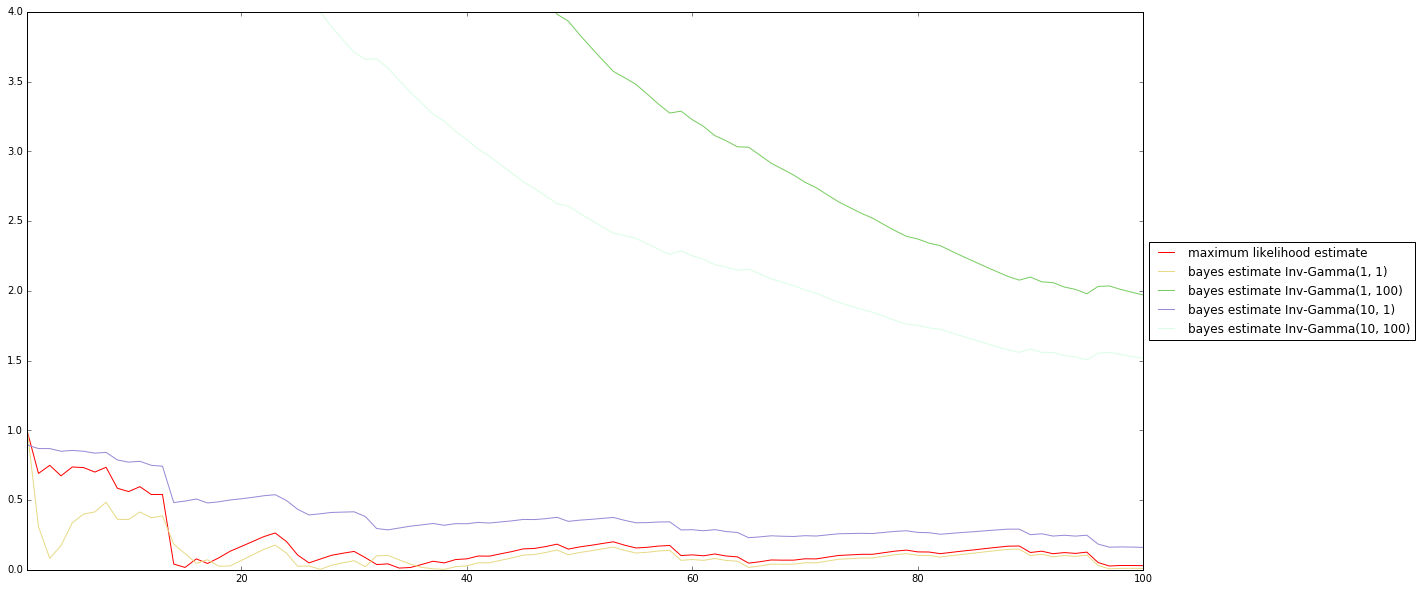

In [6]:
#Строим графики
plt.figure(figsize=(20,10))
plt.ylim((0, 4))
plt.xlim((1, 100))

plt.plot(grid, abs(MLE_est - 1), color='red', label='maximum likelihood estimate')

for i in range(4):
    plt.plot(grid, abs(bayes_est[i] - 1), color=random.rand(3,1), label='bayes estimate Inv-Gamma(' \
             + str(int(params[i][0])) + ', ' + str(int(params[i][1])) + ')')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Вывод: лучшие оценки - оценка максимального правдоподобия и байесовская оценка с априорным распределением Inv-Gamma(1, 1)